## MuSpAn with QuPath

QuPath (https://qupath.github.io) is a powerful tool for exploring imaging data in digital pathology. In this tutorial, we’ll demonstrate how to import objects generated in QuPath into MuSpAn for spatial analysis. This process leverages the GeoJSON file format, which is designed for transferring spatial data efficiently.

Below is a flowchart outlining the workflow for creating and exporting a GeoJSON file from QuPath:

![A flow chart of exporting regions of interest from QuPath](QuPath_tutorial.png)

In this demonstration, we’ll explore a region of murine colorectal cancer (CRC) images analyzed using multiplex immunofluorescence (IF). The flowchart above outlines the steps:

1. In QuPath, we defined a square boundary (labeled "boundary") and performed cell segmentation within this area ("cells").
2. Additionally, we created another shape called "Region 1."
3. After defining and naming these objects, we exported them as a GeoJSON file, named `qupath_example_data.geojson`.
This exported file has been preloaded into MuSpAn for this demonstration, allowing us to showcase the process of loading QuPath output data.

If you'd like to use this functionality with your own data:

1. Export your GeoJSON file from QuPath and save it locally.
2. Update the `my_qupath_file` line in the code below to point to your file.
Now, let’s begin! First, we’ll import some helpful libraries, and then use the `qupath_to_domain` function from the `io` submodule to load our mouse CRC sample as shown in the flowchart.


In [1]:
# Import necessary libraries
import muspan as ms
import matplotlib.pyplot as plt
import os

# Define the path to the QuPath file
my_qupath_file = os.path.dirname(ms.datasets.__file__) + '/data/qupath_example_data.geojson' 
# Note: Edit the above path to point to your specific file if needed

# Load the QuPath data into a domain object
qupath_domain = ms.io.qupath_to_domain(my_qupath_file, domain_name='qupath data', pixel_size=[0.4976, 0.4976])

Domain name: qupath data
Number of objects: 260
Collections: ['annotation', 'cell', 'Simplified boundaries']
Labels: ['name', 'Nucleus: Area', 'Nucleus: Perimeter', 'Nucleus: Circularity', 'Nucleus: Max caliper', 'Nucleus: Min caliper', 'Nucleus: Eccentricity', 'Nucleus: DAPI mean', 'Nucleus: DAPI sum', 'Nucleus: DAPI std dev', 'Nucleus: DAPI max', 'Nucleus: DAPI min', 'Nucleus: DAPI range', 'Nucleus: Opal 570 mean', 'Nucleus: Opal 570 sum', 'Nucleus: Opal 570 std dev', 'Nucleus: Opal 570 max', 'Nucleus: Opal 570 min', 'Nucleus: Opal 570 range', 'Nucleus: Opal 690 mean', 'Nucleus: Opal 690 sum', 'Nucleus: Opal 690 std dev', 'Nucleus: Opal 690 max', 'Nucleus: Opal 690 min', 'Nucleus: Opal 690 range', 'Nucleus: Opal 480 mean', 'Nucleus: Opal 480 sum', 'Nucleus: Opal 480 std dev', 'Nucleus: Opal 480 max', 'Nucleus: Opal 480 min', 'Nucleus: Opal 480 range', 'Nucleus: Opal 620 mean', 'Nucleus: Opal 620 sum', 'Nucleus: Opal 620 std dev', 'Nucleus: Opal 620 max', 'Nucleus: Opal 620 min', 'Nuc

This looks promising! Behind the scenes, MuSpAn processes the data exported from QuPath, aligning the labels and metadata associated with the automatically generated objects. This includes information like geometric measurements of cells and summary statistics for stain intensities, as shown in the "Labels" output above.

By default, MuSpAn imports cells as their centroids (the central points of the cell shapes, rather than importing the full cell boundary as a MuSpAn shape). Using centroids significantly speeds up spatial analysis, making this approach ideal for large regions of interest. Let’s take a look at how this works!

(<Figure size 1200x900 with 8 Axes>, <Axes: >)

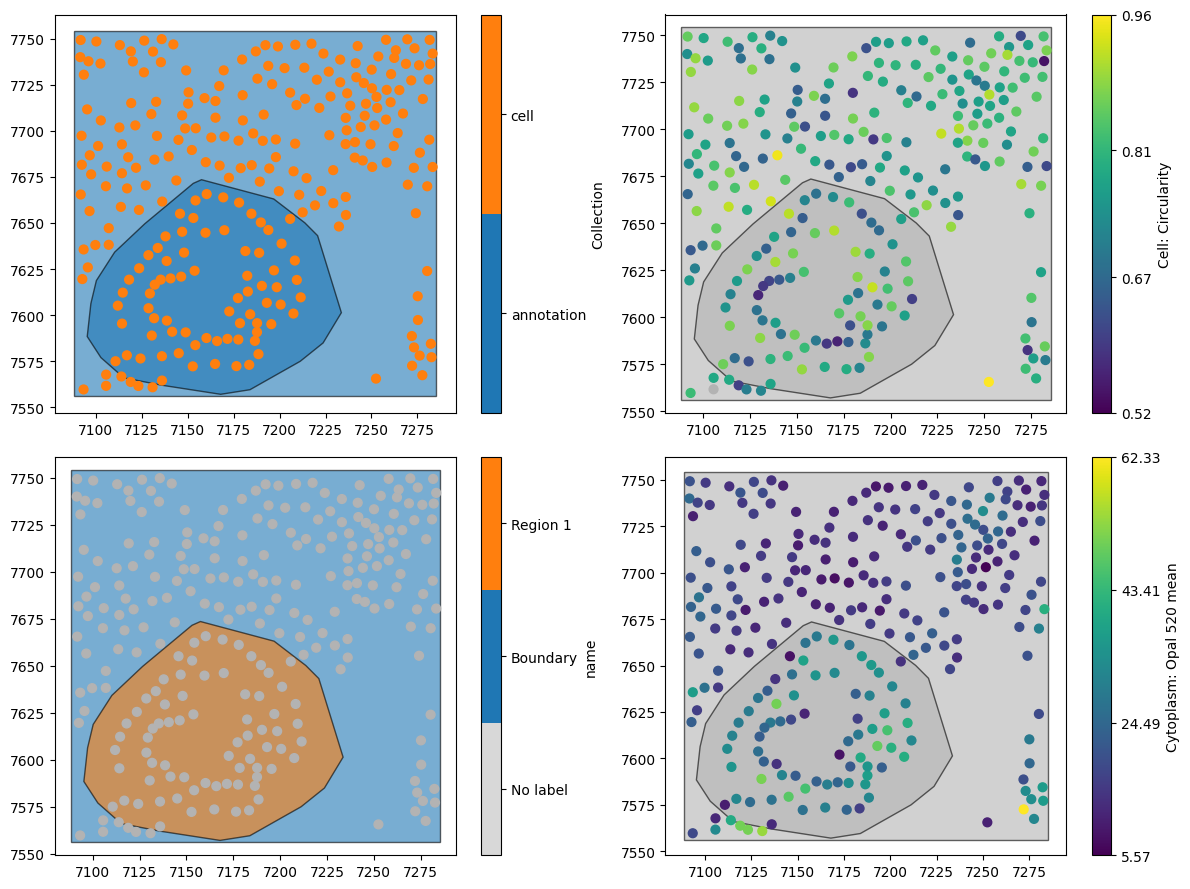

In [2]:
# Create a figure and a set of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(figsize=(12, 9), nrows=2, ncols=2)

# Visualize the qupath_domain data on the first subplot
ms.visualise.visualise(qupath_domain, marker_size=40, ax=ax[0, 0])

# Visualize the qupath_domain data on the second subplot, colored by 'name'
ms.visualise.visualise(qupath_domain, marker_size=40, ax=ax[1, 0], color_by='name')

# Visualize the qupath_domain data on the third subplot, colored by 'Cell: Circularity'
ms.visualise.visualise(qupath_domain, marker_size=40, ax=ax[0, 1], color_by='Cell: Circularity')

# Visualize the qupath_domain data on the fourth subplot, colored by 'Cytoplasm: Opal 520 mean'
ms.visualise.visualise(qupath_domain, marker_size=40, ax=ax[1, 1], color_by='Cytoplasm: Opal 520 mean')

Great, this looks like the data in the flowchart, with our cells represented as points.

When importing QuPath data, we might not want all metadata to be imported into MuSpAn, as some of it might not be relevant. In this case, we can use the `specific_properties_as_labels` to specify only the labels we'd like to add to our MuSpAn domain.

In addition, if we'd like our cells to stay as shapes as segmented by QuPath, then we can set the `add_cells_as_points` parameter to `False`. 

Let's try both of the options out, by setting `add_cells_as_points=False` and `specific_properties_as_labels=['name', 'Cytoplasm: Opal 520 mean', 'Cell: Circularity']`.

In [3]:
# Load the QuPath data into a domain object with specific properties and simplification
qupath_domain_exact = ms.io.qupath_to_domain(
    my_qupath_file,
    domain_name='qupath shapes',
    add_cells_as_points=False,
    pixel_size=[0.4976, 0.4976],
    properties_to_ignore=['isLocked', 'objectType', 'color'],
    specific_properties_as_labels=['name', 'Cytoplasm: Opal 520 mean', 'Cell: Circularity'],
    simplify_shapes=True,
    simplify_shapes_kwargs=dict(algorithm='Visvalingam-Whyatt', epsilon=0.75)
)

Domain name: qupath shapes
Number of objects: 260
Collections: ['annotation', 'cell', 'Simplified boundaries']
Labels: ['name', 'Cell: Circularity', 'Cytoplasm: Opal 520 mean'] 
Networks: [] 
Distance matrices: []


We can now see that we have only three sets of labels. Let's see that these data now look like.

(<Figure size 1200x900 with 8 Axes>, <Axes: >)

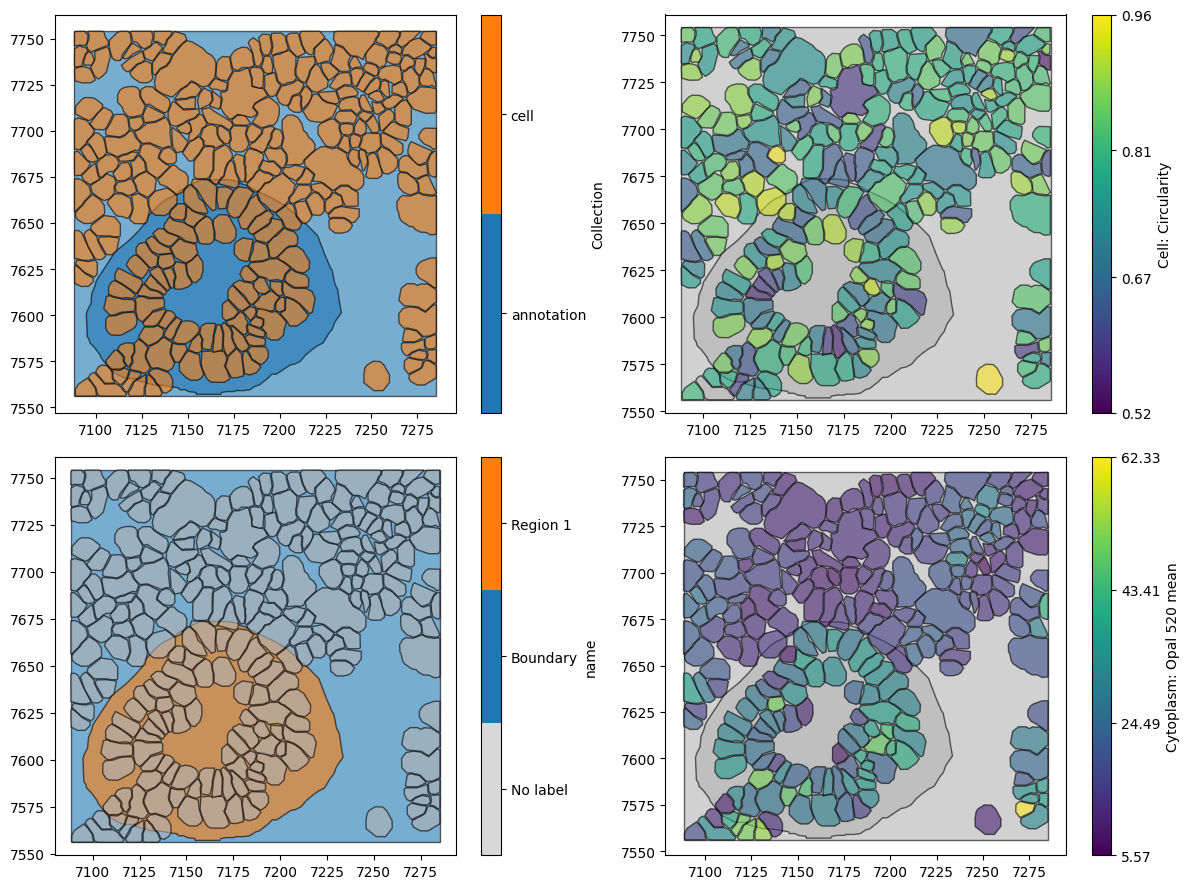

In [4]:
# Create a figure and a set of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(figsize=(12, 9), nrows=2, ncols=2)

# Visualize the qupath_domain_exact data on the first subplot
ms.visualise.visualise(qupath_domain_exact, marker_size=40, ax=ax[0, 0])

# Visualize the qupath_domain_exact data on the second subplot, colored by 'name'
ms.visualise.visualise(qupath_domain_exact, marker_size=40, ax=ax[1, 0], color_by='name')

# Visualize the qupath_domain_exact data on the third subplot, colored by 'Cell: Circularity'
ms.visualise.visualise(qupath_domain_exact, marker_size=40, ax=ax[0, 1], color_by='Cell: Circularity')

# Visualize the qupath_domain_exact data on the fourth subplot, colored by 'Cytoplasm: Opal 520 mean'
ms.visualise.visualise(qupath_domain_exact, marker_size=40, ax=ax[1, 1], color_by='Cytoplasm: Opal 520 mean')

Using the `qupath_to_domain` functionality, we have a lot of flexibility in how we transfer information from QuPath to MuSpAn. This can be very useful to define annotated regions to use in your spatial analysis workflows for defining internal boundaries and beyond!

For details on more functionality around importing from QuPath, we recommend checking out the relevant documentation for `muspan.io.qupath_to_domain` to ensure you can fully exploit MuSpAn for spatial biology while working with your data in QuPath.